11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7698 - loss: 0.7836 - val_accuracy: 0.9503 - val_loss: 0.2135
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9403 - loss: 0.2495 - val_accuracy: 0.9658 - val_loss: 0.1621
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9555 - loss: 0.1992 - val_accuracy: 0.9682 - val_loss: 0.1526
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9644 - loss: 0.1692 - val_accuracy: 0.9728 - val_loss: 0.1410
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9701 - loss: 0.1504 - val_accuracy: 0.9736 - val_loss: 0.1414
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9720 - loss: 0.1425 - val_accuracy: 0.9760 - val_loss: 0.1346
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9749 - loss: 0.1334 - val_accuracy: 0.9764 - val_loss: 0.1325
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9776 - loss: 0.1228 - val_acc

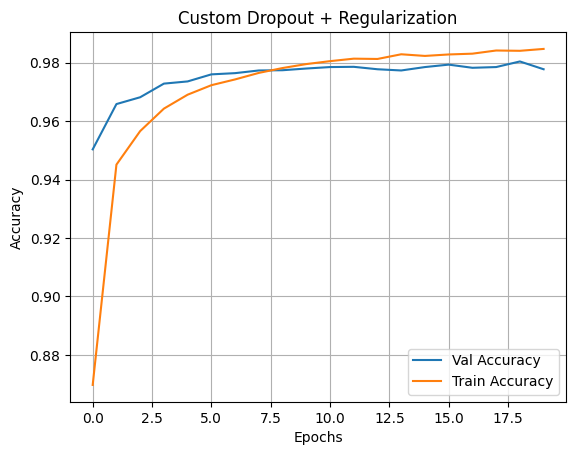

In [ ]:
# 07_custom_dropout_regularization.ipynb

# 📌 Objective: Implement custom dropout layer and custom regularizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# ✅ Custom Dropout Layer (Always applies dropout during training)
class CustomDropout(layers.Layer):
    def __init__(self, rate):
        super().__init__()
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs

# ✅ Custom Regularizer (L2 but scaled differently)
class CustomL2Regularizer(keras.regularizers.Regularizer):
    def __init__(self, strength=1e-4):
        self.strength = strength

    def __call__(self, x):
        return self.strength * tf.reduce_sum(tf.square(x))

    def get_config(self):
        return {"strength": self.strength}

# ✅ Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# ✅ Build model with custom dropout and regularizer
def build_custom_regularized_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(784,),
                     kernel_regularizer=CustomL2Regularizer(1e-4)),
        CustomDropout(0.3),
        layers.Dense(128, activation='relu',
                     kernel_regularizer=CustomL2Regularizer(1e-4)),
        CustomDropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_custom_regularized_model()

# ✅ Train model
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_split=0.2, verbose=1)

# ✅ Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

# ✅ Plot training history
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Custom Dropout + Regularization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()